In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import Callback 
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model

/Users/aryaprabhudesai/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
classifier = Sequential()

In [3]:
# Add convolution layer
classifier.add(Convolution2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
classifier.add(Convolution2D(filters=32, kernel_size=(3,3), activation='relu'))

In [4]:
# Pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [5]:
# More convolution
classifier.add(Convolution2D(filters=32, kernel_size=(3,3), activation='relu'))
classifier.add(Convolution2D(filters=32, kernel_size=(3,3), activation='relu'))

In [6]:
# Pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [7]:
# Flatten
classifier.add(Flatten())

In [8]:
# Add full connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(rate =0.1))
classifier.add(Dense(units=46, activation='softmax'))

In [9]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
print(classifier.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
__________

In [11]:
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train_set = train_datagen.flow_from_directory(
        '/Users/aryaprabhudesai/Desktop/PPL/Train',
        color_mode='grayscale',
        target_size=(28,28),
        batch_size=32,
        class_mode='categorical')

Found 78200 images belonging to 46 classes.


In [15]:
test_set = test_datagen.flow_from_directory(
        '/Users/aryaprabhudesai/Desktop/PPL/Test',
        color_mode='grayscale',
        target_size=(28,28),
        batch_size=32,
        class_mode='categorical')

Found 13800 images belonging to 46 classes.


In [16]:
import os
if not os.path.exists('checkpoints'):
    os.mkdir('checkpoints')
del os

In [17]:
checkpoint_path = 'checkpoints/weights-improvement-{epoch:02d}-{loss:.4f}.h5'
model_checkpoint = ModelCheckpoint(
        checkpoint_path, monitor='loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss')
callbacks_list = [model_checkpoint, early_stopping]

In [18]:
# train model
history = classifier.fit_generator(
        train_set,
        steps_per_epoch=train_set.n//train_set.batch_size,
        epochs= 10,
        validation_data=test_set,
        validation_steps=test_set.n//test_set.batch_size)

Epoch 1/10
2443/2443 [==============================] - 328s 134ms/step - loss: 0.6660 - acc: 0.8078 - val_loss: 0.2116 - val_acc: 0.9351
Epoch 2/10
2443/2443 [==============================] - 200s 82ms/step - loss: 0.1813 - acc: 0.9437 - val_loss: 0.1766 - val_acc: 0.9439
Epoch 3/10
2443/2443 [==============================] - 202s 82ms/step - loss: 0.1168 - acc: 0.9630 - val_loss: 0.3072 - val_acc: 0.9199
Epoch 4/10
2443/2443 [==============================] - 205s 84ms/step - loss: 0.0867 - acc: 0.9715 - val_loss: 0.2072 - val_acc: 0.9416
Epoch 5/10
2443/2443 [==============================] - 204s 84ms/step - loss: 0.0669 - acc: 0.9783 - val_loss: 0.4703 - val_acc: 0.8961
Epoch 6/10
2443/2443 [==============================] - 203s 83ms/step - loss: 0.0539 - acc: 0.9828 - val_loss: 0.4741 - val_acc: 0.8992
Epoch 7/10
2443/2443 [==============================] - 201s 82ms/step - loss: 0.0473 - acc: 0.9848 - val_loss: 0.5210 - val_acc: 0.8978
Epoch 8/10
2443/2443 [==================

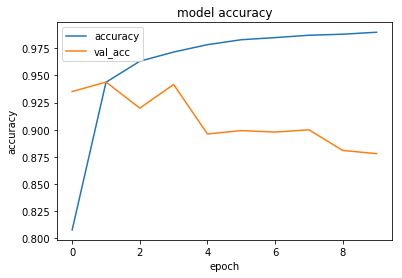

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_acc'], loc='upper left')
plt.show()

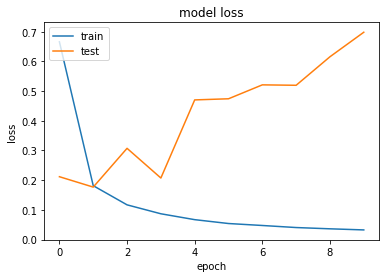

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [2]:
classifier.save('model_keras1_new.h5')

NameError: name 'classifier' is not defined

In [22]:
def validate(classifier, test_set, steps):
    import numpy as np
    correct = 0
    n_guesses = 0
    for i in range(steps):
        a = test_set.next()
        prediction = a[0]
        yhat = classifier.predict(prediction)
        y = a[1]
        for i in range(len(yhat)):
            n_guesses += 1
            if np.argmax(yhat[i]) == np.argmax(y[i]):
                correct += 1
    return float(correct)/float(n_guesses)

In [1]:
print(validate(classifier, test_set, 10))

NameError: name 'validate' is not defined